In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [90]:
clients = pd.read_csv("clients.csv")
clients.head()

,ID,Building,Year of sale,Month of sale,Type of property,Property number,Area (ft.),Price,Status,Customer ID,...,Y,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
0,1030,1,2005,11,Apartment,30,743.09,"$ 246,172.68",Sold,C0028,...,1986.0,6.0,21.0,F,USA,California,Home,5,No,Website
1,1029,1,2005,10,Apartment,29,756.21,"$ 246,331.90",Sold,C0027,...,1983.0,2.0,24.0,F,USA,California,Home,5,No,Website
2,2002,2,2007,7,Apartment,2,587.28,"$ 209,280.91",Sold,C0112,...,1985.0,12.0,27.0,M,USA,California,Home,1,Yes,Client
3,2031,2,2007,12,Apartment,31,1604.75,"$ 452,667.01",Sold,C0160,...,1985.0,12.0,27.0,M,USA,California,Investment,3,Yes,Website
4,1049,1,2004,11,Apartment,49,1375.45,"$ 467,083.31",Sold,C0014,...,1979.0,5.0,15.0,F,USA,California,Home,4,No,Agency


In [91]:
clients = clients.rename(columns={"Age at time of purchase": "Age", "Area (ft.)": "Area", "Age Interval ": "Age interval"})
clients = clients.drop(columns=["ID", "Customer ID", "Name", "Surname", "Y", "M", "D", "Status", "Building", "Property number"])
clients["Area"] = clients['Area'] * 0.093

In [92]:
clients['Price'] = clients['Price'].apply(
    lambda x: x.translate({ord('$'): None, ord(' '): None, ord(','): None})).astype(float)
clients['Country'] = clients['Country'].apply(lambda x: ('USA' if x == "USA " else x))
clients['Country'] = clients['Country'].apply(lambda x: ('Other' if x in ['Mexico', 'Belgium', 'Germany', 'UK', 'Denmark'] else x))
clients['State'] = clients['State'].apply(lambda x: ('Other' if x in ['Wyoming', 'Kansas', 'Virginia'] else x))
clients['Gender'] = clients['Gender'].apply(lambda x: ('male' if x == "M" else 'female'))

In [45]:
clients.head()

,Year of sale,Month of sale,Type of property,Area,Price,Entity,Age,Age interval,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
0,2005,11,Apartment,69.10737,246172.68,Individual,19.0,18-25,female,USA,California,Home,5,No,Website
1,2005,10,Apartment,70.32753,246331.90,Individual,22.0,18-25,female,USA,California,Home,5,No,Website
2,2007,7,Apartment,54.61704,209280.91,Individual,22.0,18-25,male,USA,California,Home,1,Yes,Client
3,2007,12,Apartment,149.24175,452667.01,Individual,22.0,18-25,male,USA,California,Investment,3,Yes,Website
4,2004,11,Apartment,127.91685,467083.31,Individual,25.0,18-25,female,USA,California,Home,4,No,Agency


In [46]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year of sale       195 non-null    int64  
 1   Month of sale      195 non-null    int64  
 2   Type of property   195 non-null    object 
 3   Area               195 non-null    float64
 4   Price              195 non-null    float64
 5   Entity             195 non-null    object 
 6   Age                178 non-null    float64
 7   Age interval       178 non-null    object 
 8   Gender             195 non-null    object 
 9   Country            195 non-null    object 
 10  State              181 non-null    object 
 11  Purpose            195 non-null    object 
 12  Deal satisfaction  195 non-null    int64  
 13  Mortgage           195 non-null    object 
 14  Source             195 non-null    object 
dtypes: float64(3), int64(3), object(9)
memory usage: 23.0+ KB


243052.59


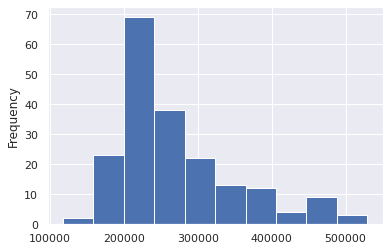

In [47]:
print(clients["Price"].median())
clients["Price"].plot.hist();

73.04964


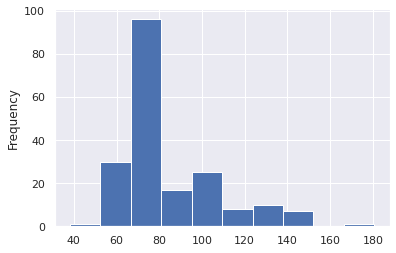

In [48]:
print(clients["Area"].median())
clients["Area"].plot.hist();

45.0


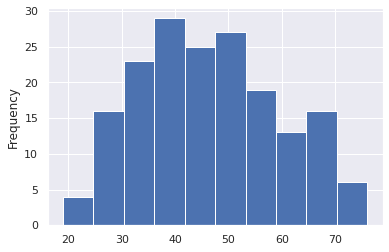

In [49]:
print(clients["Age"].median())
clients["Age"].plot.hist();

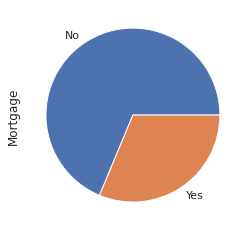

In [51]:
clients['Mortgage'].value_counts().plot.pie();

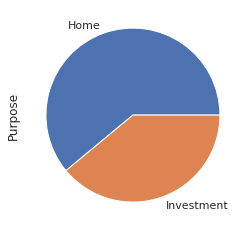

In [52]:
clients['Purpose'].value_counts().plot.pie();

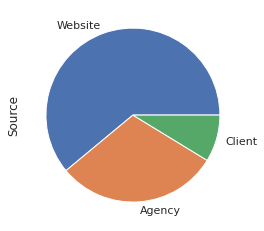

In [53]:
clients['Source'].value_counts().plot.pie();

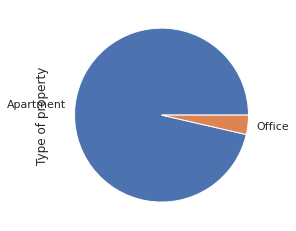

In [54]:
clients['Type of property'].value_counts().plot.pie();

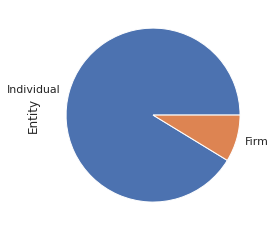

In [55]:
clients['Entity'].value_counts().plot.pie();

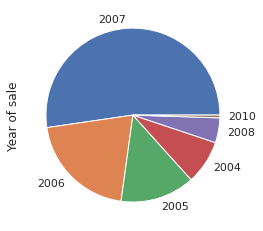

In [56]:
clients['Year of sale'].value_counts().plot.pie();

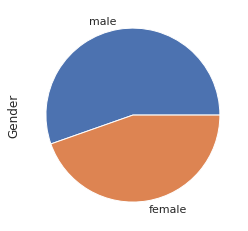

In [57]:
clients['Gender'].value_counts().plot.pie();

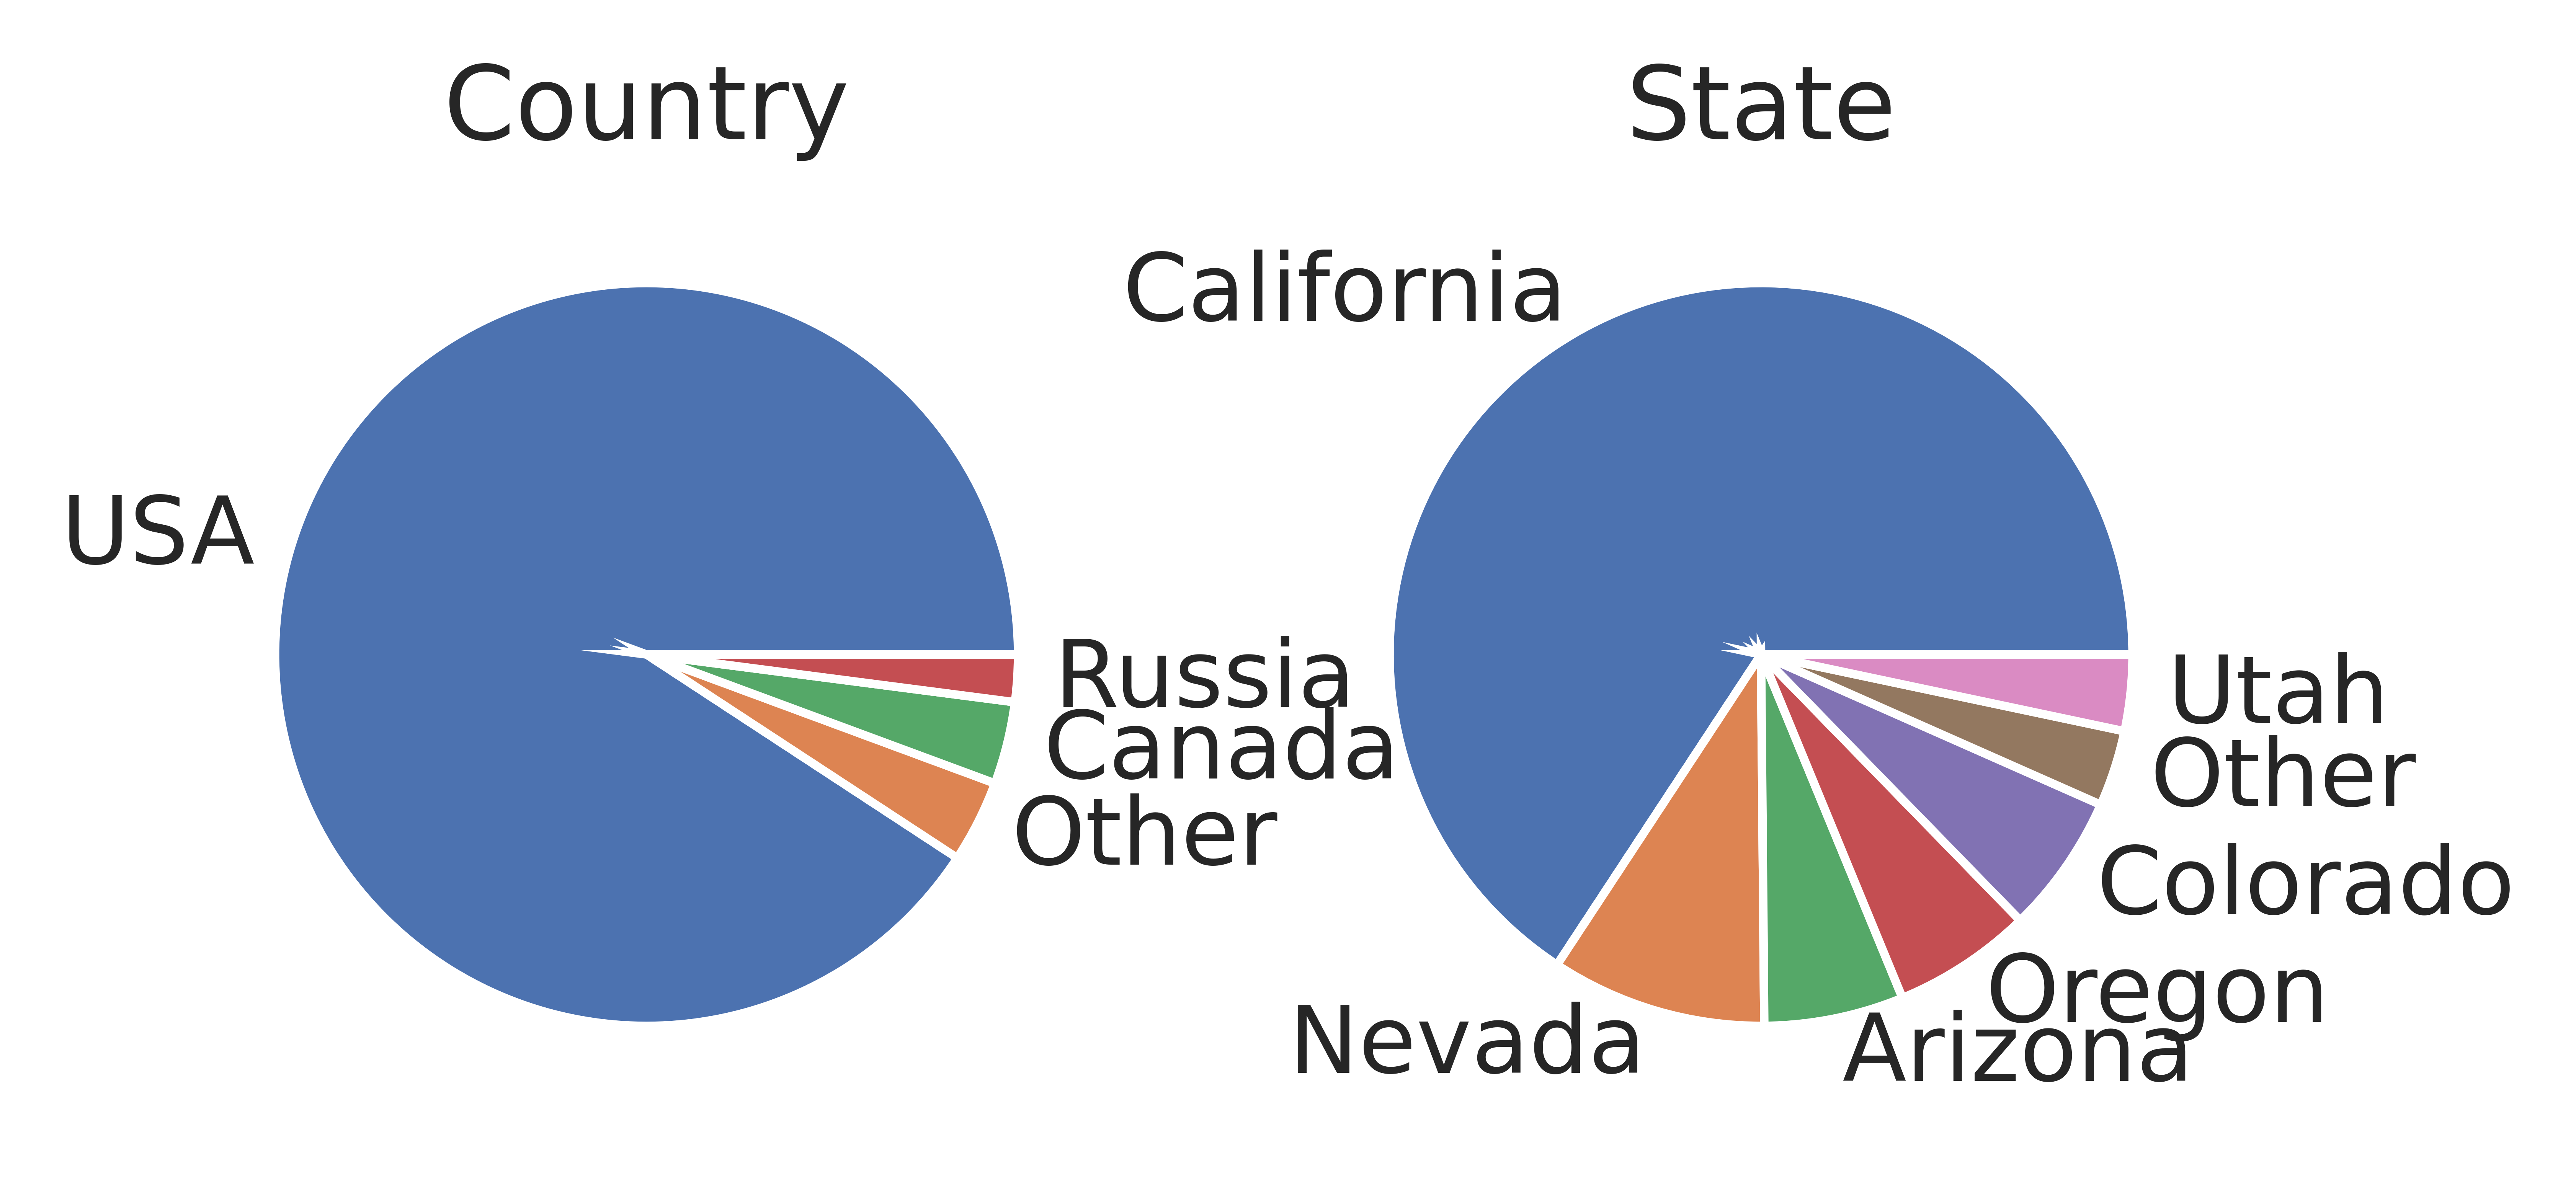

In [93]:
fig = plt.figure(figsize=(9,5), dpi=1600)
ax1 = plt.subplot2grid((2,4),(0,0))
plt.pie(clients['Country'].value_counts(), labels=clients['Country'].value_counts().index)
plt.title('Country')

ax1 = plt.subplot2grid((2, 4), (0, 1))
plt.pie(clients['State'].value_counts(), labels=clients['State'].value_counts().index)
plt.title('State');

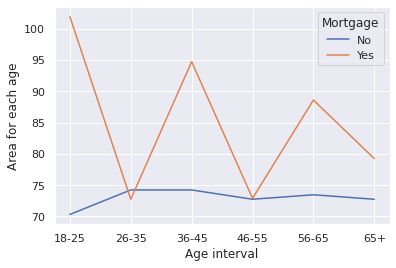

In [59]:
pd.pivot_table(data=clients, index='Age interval',columns="Mortgage", values='Area', aggfunc=np.median).plot()
plt.ylabel('Area for each age');

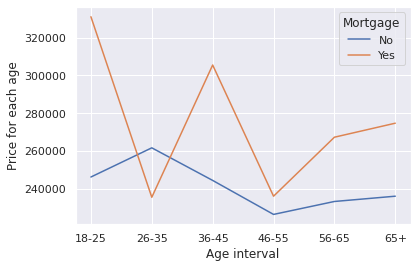

In [60]:
pd.pivot_table(data=clients, index='Age interval',columns="Mortgage", values='Price', aggfunc=np.median).plot()
plt.ylabel('Price for each age');

In [61]:
clients['Age'] = clients["Age"].fillna(clients["Age"].median())
clients['Age interval'] = clients["Age interval"].fillna('36-45')
clients['Gender'] = clients["Gender"].fillna('M')
clients['State'] = clients["State"].fillna('California')

**Вывод:**
"Средним" клиентом компании является мужчина средних лет (35-50 лет), проживающий в США, как правило, в калифорнии. Покупаются чаще всего помещения для личного проживания площадью около 75 кв. м. стоимостью порядка 250 000 долларов. Большая часть покупок совершается единым платежом, при этом в ипотеку обычно берут помещения с большей площадью и ценой соответственно. Большинство клиентов обращаются в компанию после посещения сайта. Почти все сделки осуществились в 2005 - 2007 годах.